# Clustering 

Clustering is an unsupervised learning technique that groups similar data points together so that items in the same group (cluster) are more similar to each other than to items in other groups.

## Prototype-Based Clustering

Uses a prototype (usually the cluster mean or centroid) to represent each cluster.

Data points are assigned to the nearest prototype.

### K-Means Clustering

A popular prototype-based algorithm.

**Steps:**

1. Choose k cluster centers (randomly).

2. Assign each point to the nearest center.

3. Update the centers as the mean of points in each cluster.

4. Repeat until convergence.


Warning message:
"package 'factoextra' is in use and will not be installed"


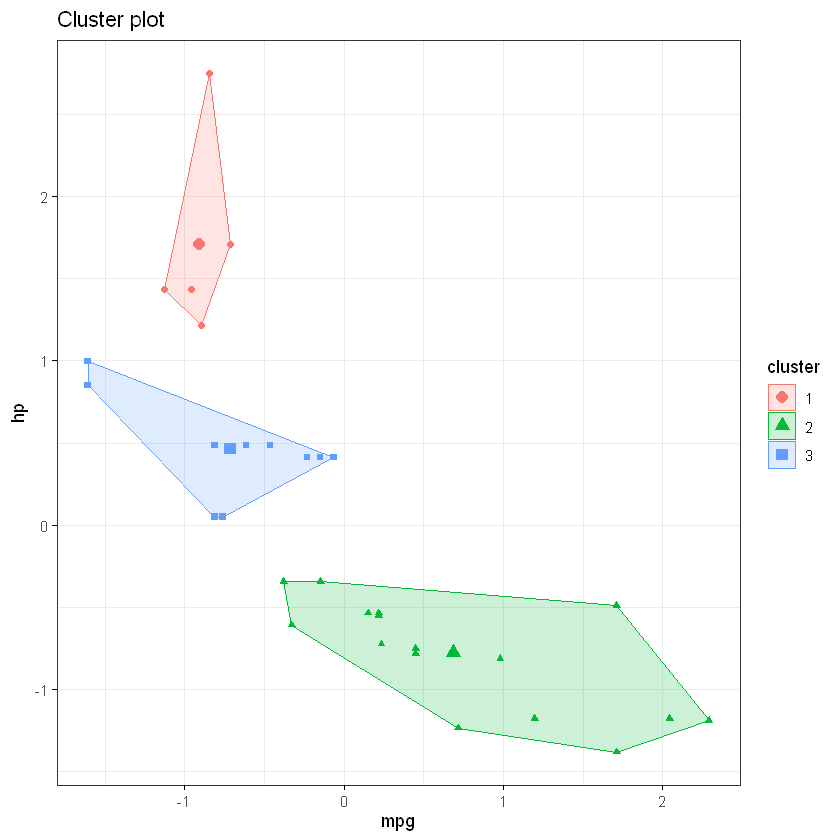

In [5]:
# Install if needed
install.packages("factoextra")

library(factoextra)

# Use mtcars dataset
df <- mtcars[, c("mpg", "hp")]

# Run K-means clustering with 3 clusters
set.seed(123)
kmeans_result <- kmeans(df, centers = 3, nstart = 20)

# Visualize clusters with boundaries
fviz_cluster(kmeans_result, data = df,
             geom = "point",
             ellipse.type = "convex", # boundary around clusters
             ggtheme = theme_bw())


## Hierarchical Clustering 

Hierarchical clustering is an unsupervised learning method that builds a hierarchy (tree structure) of clusters.

Unlike K-means, you don’t need to predefine the number of clusters.

The result is often visualized with a dendrogram, which shows how clusters are merged or split.

### Types of Hierarchical Clustering
#### Agglomerative Clustering (Bottom-Up)

1. Starts with each data point as its own cluster.

2. At each step, the two closest clusters are merged.

3. Continues until all points form a single cluster.

4. Most commonly used in practice.

### Divisive Clustering (Top-Down)

1. Starts with all points in one big cluster.

2. Iteratively splits clusters into smaller ones.

3. Computationally more expensive, less common than agglomerative.

Mazda RX4       Mazda RX4 Wag          Datsun 710      Hornet 4 Drive 
                  1                   1                   1                   1 
  Hornet Sportabout             Valiant          Duster 360           Merc 240D 
                  2                   1                   2                   1 
           Merc 230            Merc 280           Merc 280C          Merc 450SE 
                  1                   1                   1                   2 
         Merc 450SL         Merc 450SLC  Cadillac Fleetwood Lincoln Continental 
                  2                   2                   2                   2 
  Chrysler Imperial            Fiat 128         Honda Civic      Toyota Corolla 
                  2                   1                   1                   1 
      Toyota Corona    Dodge Challenger         AMC Javelin          Camaro Z28 
                  1                   2                   2                   2 
   Pontiac Firebird           Fiat X1-9       Porsche 914-2        Lotus Europa 
                  2                   1                   1                   1 
     Ford Pantera L        Ferrari Dino       Maserati Bora          Volvo 142E 
                  2                   2                   3                   1

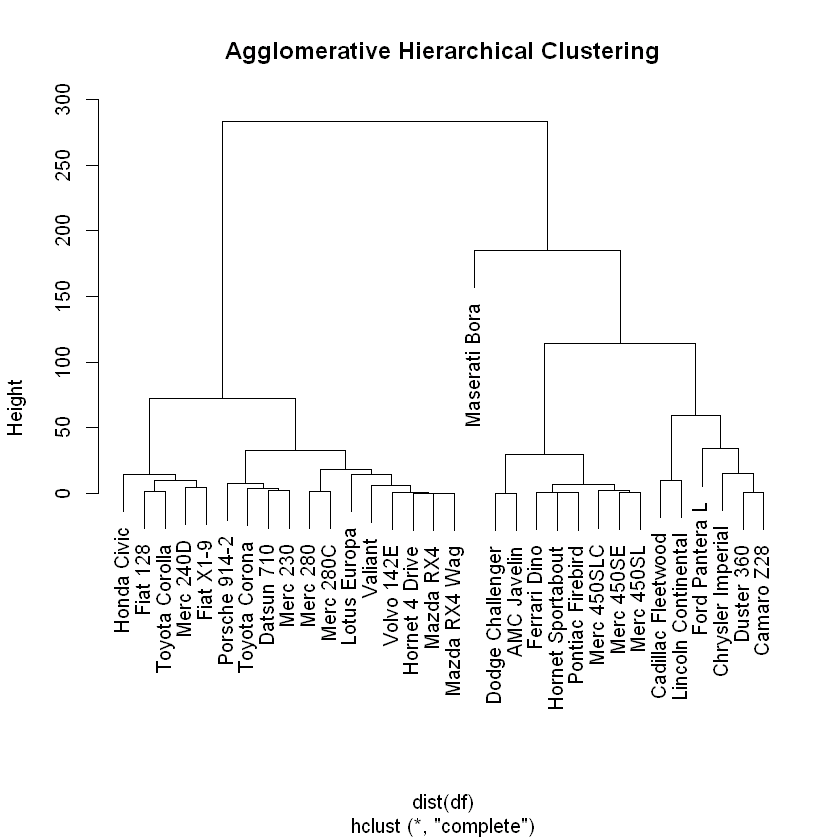

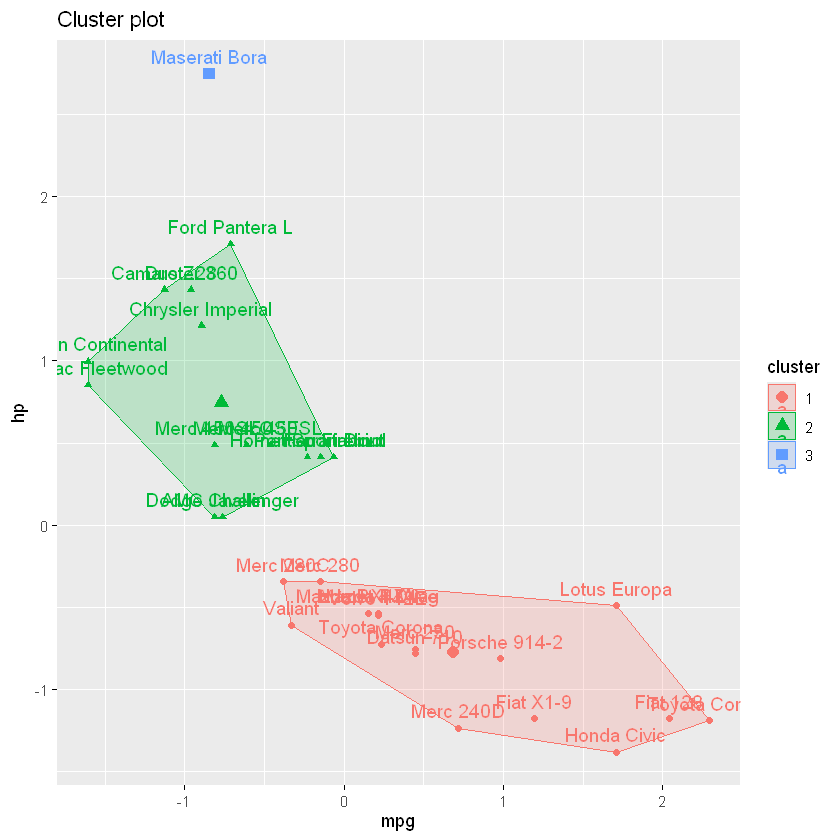

In [12]:
# Simple Agglomerative Clustering
df <- mtcars[, c("mpg", "hp")]

hc <- hclust(dist(df))   # compute distance + clustering
plot(hc, main = "Agglomerative Hierarchical Clustering")

# Cut into 3 clusters
clusters <- cutree(hc, k = 3)
clusters

fviz_cluster(list(data = df, cluster = clusters))


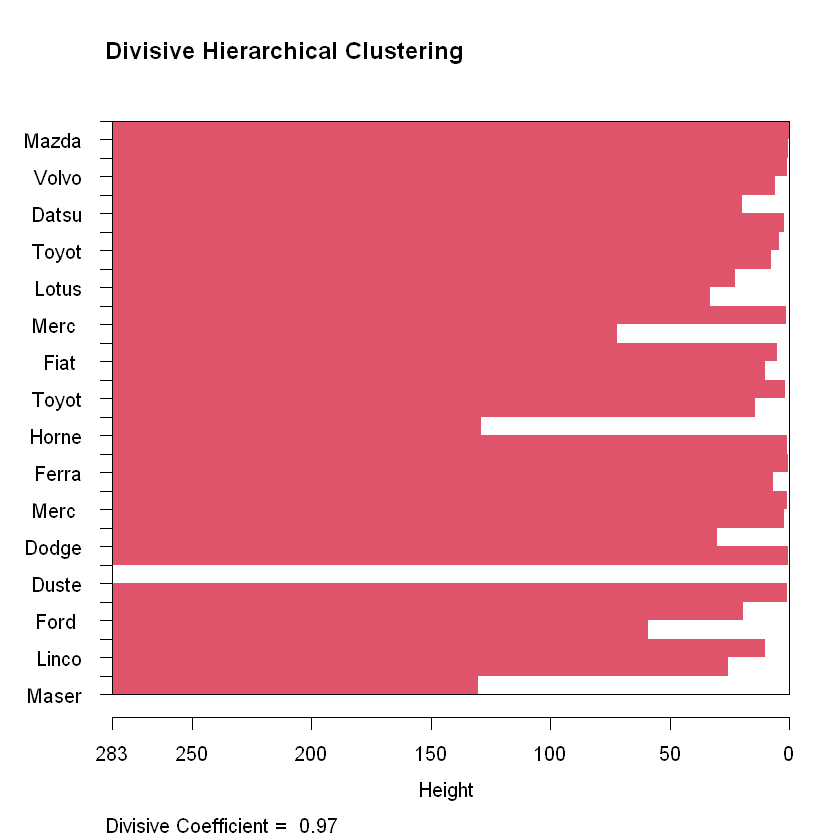

Mazda RX4       Mazda RX4 Wag          Datsun 710      Hornet 4 Drive 
                  1                   1                   1                   1 
  Hornet Sportabout             Valiant          Duster 360           Merc 240D 
                  1                   1                   2                   1 
           Merc 230            Merc 280           Merc 280C          Merc 450SE 
                  1                   1                   1                   1 
         Merc 450SL         Merc 450SLC  Cadillac Fleetwood Lincoln Continental 
                  1                   1                   2                   2 
  Chrysler Imperial            Fiat 128         Honda Civic      Toyota Corolla 
                  2                   1                   1                   1 
      Toyota Corona    Dodge Challenger         AMC Javelin          Camaro Z28 
                  1                   1                   1                   2 
   Pontiac Firebird           Fiat X1-9       Porsche 914-2        Lotus Europa 
                  1                   1                   1                   1 
     Ford Pantera L        Ferrari Dino       Maserati Bora          Volvo 142E 
                  2                   1                   3                   1

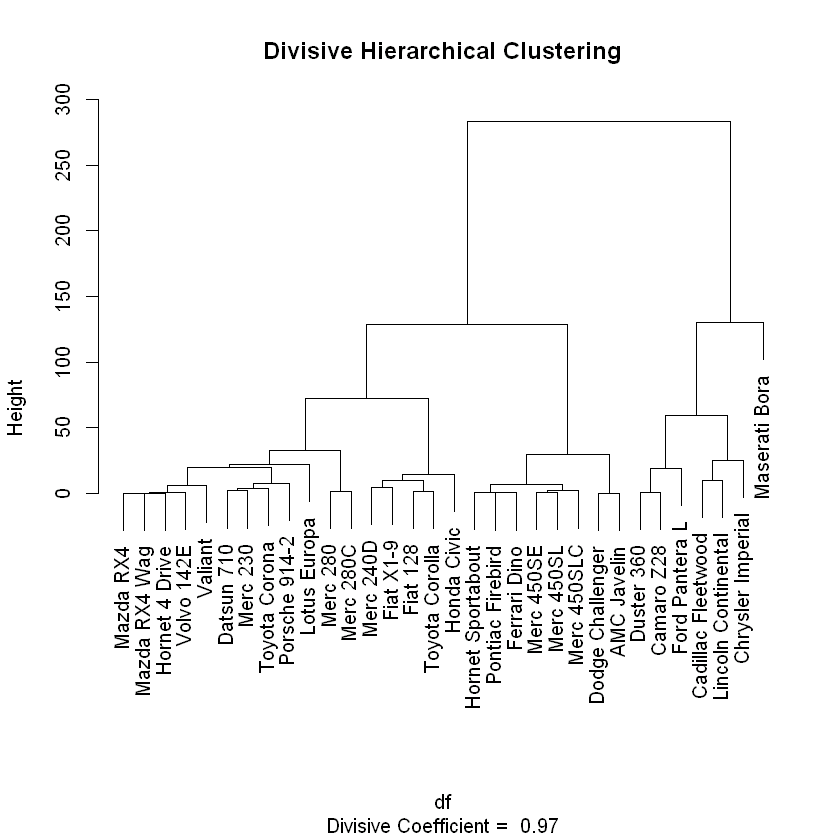

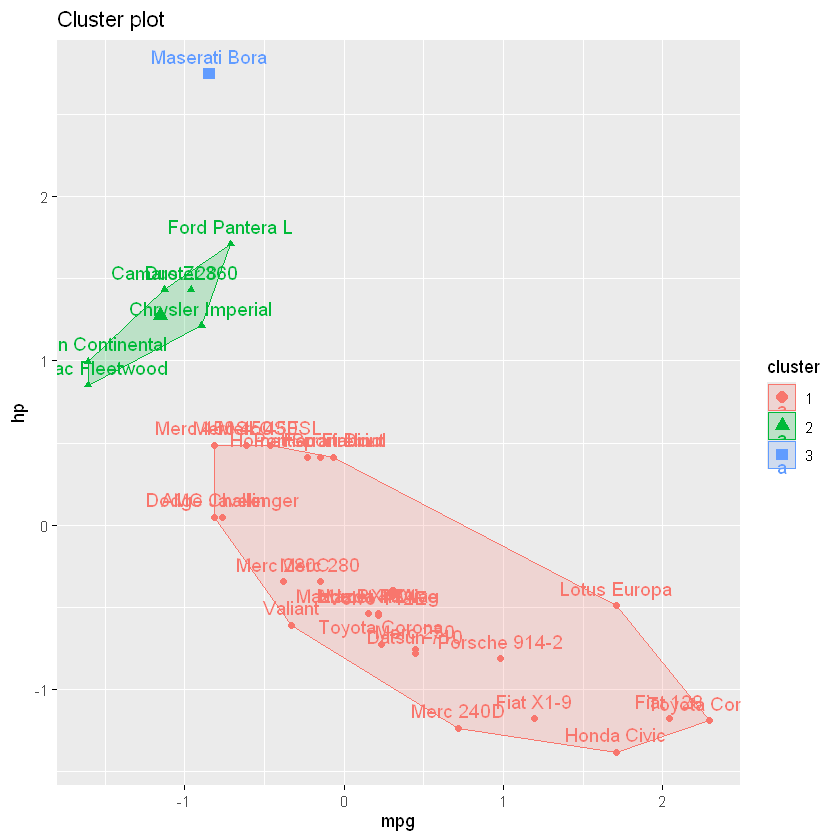

In [15]:
# Simple Divisive Clustering
library(cluster)

df <- mtcars[, c("mpg", "hp")]

diana_model <- diana(df)   # run divisive clustering
plot(diana_model, main = "Divisive Hierarchical Clustering")

# Cut into 3 clusters
clusters_div <- cutree(as.hclust(diana_model), k = 3)
clusters_div

fviz_cluster(list(data = df, cluster = clusters_div))

### Density-Based Clustering 

Density-based clustering groups points that are closely packed together (dense regions) and separates them from regions of low density (noise).

The most popular algorithm is DBSCAN (Density-Based Spatial Clustering of Applications with Noise).

**Key Parameters in DBSCAN:**

eps → radius (neighborhood size).

minPts → minimum number of points required to form a dense region (cluster).

**Advantages:**

1. Finds clusters of arbitrary shape (not just circular/spherical).
2. Automatically detects noise/outliers.
3. Struggles when clusters have very different densities.

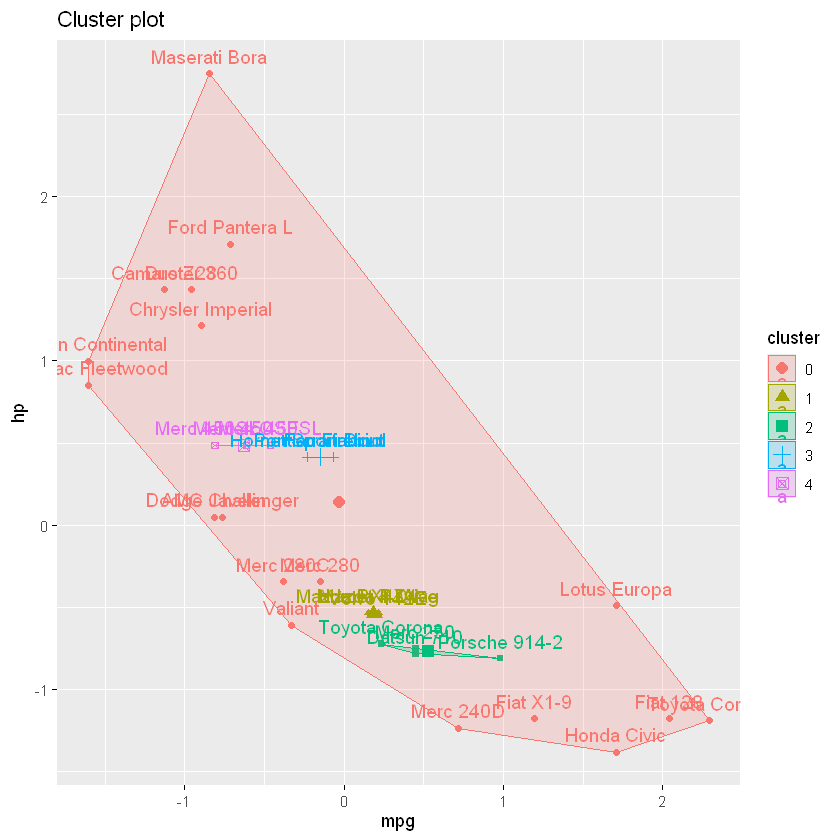

In [10]:
library(dbscan)
library(factoextra)

# Data
df <- mtcars[, c("mpg", "hp")]

# Run DBSCAN
set.seed(123)
db <- dbscan(df, eps = 5, minPts = 3)

# Visualize clusters
fviz_cluster(list(data = df, cluster = db$cluster))


## Summary

| **Type**        | **Algorithm**          | **Key Idea**                         | **Pros**                          | **Cons**                             |
| --------------- | ---------------------- | ------------------------------------ | --------------------------------- | ------------------------------------ |
| Prototype-Based | K-Means                | Cluster around centroids             | Simple, efficient                 | Needs `k`, poor for irregular shapes |
| Hierarchical    | Agglomerative/Divisive | Merge or split clusters in hierarchy | No `k` needed, dendrogram insight | Slow on large datasets               |
| Density-Based   | DBSCAN                 | Group dense regions, mark noise      | Arbitrary shapes, finds outliers  | Sensitive to `eps` and `minPts`      |
